# Handling Missing Values in 'Travel' Dataset by Jyoti Pandey
In this Notebook:
- **Fixing Data based on Rows**
- **Fixing Data based on Columns**
- When dealing with missing data, data scientists can use two primary methods to solve the error: imputation or the removal of data.
- The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
- The other option is to remove data. When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.
- Before deciding which approach to employ, data scientists must understand why the data is missing.


**Reference**
- 2022 Python for Machine Learning and Data science Masterclass Course by Jose Portilla on Udemy
- https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/
- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/

In [1]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Reading Dataset "Travel"**

In [3]:
# Finding the shape of dataset
data = pd.read_csv("Travel.csv")
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset 'Travel'\n")
num_colum = [fea for fea in data.columns if data[fea].dtype != 'O']
cat_colum = [fea for fea in data.columns if data[fea].dtype == 'O']
num_cat_info= ['ProdTaken','CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
num_info = ['Age', 'DurationOfPitch','NumberOfTrips', 'MonthlyIncome' ]
data.isnull().sum()

There are 4888 rows and 20 columns in the dataset 'Travel'



CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Creating a Function of Percentage of Data Missing in each Feature

In [4]:
# creating a function of percentage of data missing in each feature
def percentage_missing(df):
    percentage_nan=0
    percentage_nan=100 * df.isnull().sum()/len(df)
    percentage_nan = percentage_nan[percentage_nan>0].sort_values()
    return percentage_nan

In [5]:
percent_nan = percentage_missing(data)
percent_nan
# positive percentage with missing values in dataset

TypeofContact               0.511457
PreferredPropertyStar       0.531915
NumberOfFollowups           0.920622
NumberOfChildrenVisiting    1.350245
NumberOfTrips               2.864157
Age                         4.623568
MonthlyIncome               4.766776
DurationOfPitch             5.135025
dtype: float64

Text(0.5, 0, 'Features have Missing Values')

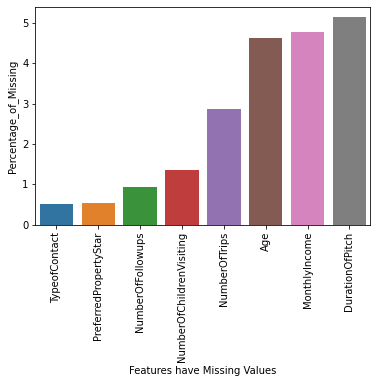

In [6]:
# visualizing missing values
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')

### **Fixing Data based on Rows**
#### It is always better to start from least percentage missing values to the higher.

In [7]:
miss_num_colum = ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
miss_cat_colum = ['NumberOfFollowups','PreferredPropertyStar','NumberOfChildrenVisiting',]
print(miss_num_colum)

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


In [8]:
print(miss_cat_colum)

['NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisiting']


The popular methods which are used by the machine learning community to handle the missing value for categorical variables in the dataset are as follows:
- Delete the observations (rows): If there is a large number of observations in the dataset, where all the classes to be predicted are sufficiently represented in the training data, then try deleting the missing value observations, which would not bring significant change in your feed to your model.
- Replace missing values with the most frequent value(mode): But in some cases, this strategy can make the data imbalanced wrt classes if there are a huge number of missing values present in our dataset.
-  Develop a model to predict missing values
-  Deleting the variable (Columns)
- Apply unsupervised Machine learning techniques


#### Considering Features that have a Very Small Percentage Missing
- TypeofContact, PreferredPropertyStar, NumberOfFollowups and NumberOfChildrenVisiting have very small percentage missing
- Few rows so we can drop them or filling them with reasionable values.

Text(0.5, 0, 'Features have Missing Values')

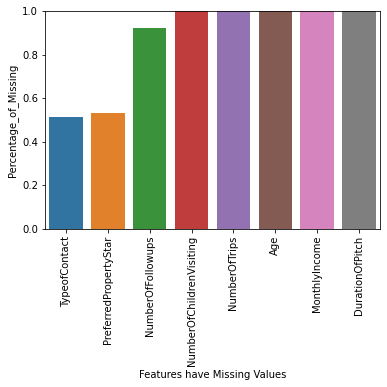

In [9]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
# 1% of your data
plt.ylim(0,1) 
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')
# its okay to drop  1% of 4888 rows.

In [10]:
percent_nan[percent_nan<1]
# three features are having less than 1 percentage of missing values

TypeofContact            0.511457
PreferredPropertyStar    0.531915
NumberOfFollowups        0.920622
dtype: float64

In [11]:
# dataset having null values at feature 'TypeofContact'
data[data['TypeofContact'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,200224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,200571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,200572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,200576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,200579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,200598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,200622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,200724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,200843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,201021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


- we observed that **'DurationOfPitch'** and **'MonthlyIncome'** are also having missing values where **'TypeofContact'** are missing

In [12]:
# dataset having null values at feature 'PreferredPropertyStar'
data[data['PreferredPropertyStar'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,202609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,202634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,203012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,203190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,203193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,203214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,203295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,203342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,203362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


- we observed that no other feature has missing values where **'PreferredPropertyStar'** is missing

In [13]:
# dataset having null values at feature 'PreferredPropertyStar'
data[data['NumberOfFollowups'].isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
79,200079,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,200094,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,200096,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,200122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,200135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,200174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,200317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,200322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,200376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,200532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


- we observed that no other feature has missing values where **'NumberOfFollowups'** is missing

In [14]:
# dropping only those rows which are having missing values at 'TypeofContact'
data = data.dropna(axis=0,subset=['TypeofContact'])
# again checking the missing values through percent_missing function
percent_nan=percentage_missing(data)
percent_nan

PreferredPropertyStar       0.534649
NumberOfFollowups           0.925355
NumberOfChildrenVisiting    1.357187
NumberOfTrips               2.878881
MonthlyIncome               4.277195
Age                         4.647337
DurationOfPitch             4.647337
dtype: float64

Text(0.5, 0, 'Features have Missing Values')

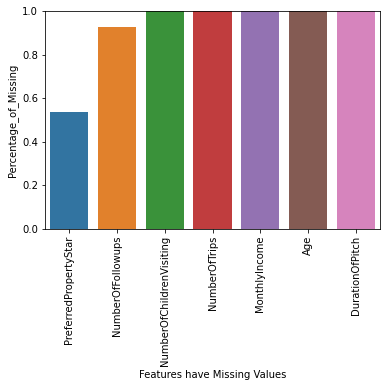

In [15]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
# 1% of your data
plt.ylim(0,1) 
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')

### Filling Values depending upon the Domain Knowledge

In [16]:
#  PreferredPropertyStar: unique values are [3.0, 4.0, 5.0, nan]  NUMERIC data, filling it with 0.0 : CONSIDERING NO PREFERRENCE as 0.0
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(0.0)
# NumberOfFollowups:  unique values are  [3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0] NUMERIC data, filling it with 0.0: CONSIDERING NO FOLLOWUPS as 0.0
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(0.0)
# NumberOfChildrenVisiting: unique values are [0.0, 2.0, 1.0, nan, 3.0] NUMERIC data, filling it with 0.0: CONSIDERING NO CHILD VISITED as 0.0
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(0.0)
# NumberOfTrips:NUMERIC data, filling it with 0.0  : CONSIDERING NO TRIPS as 0.0
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(0.0)         

In [17]:
percent_nan=percentage_missing(data)
percent_nan

MonthlyIncome      4.277195
Age                4.647337
DurationOfPitch    4.647337
dtype: float64

Text(0.5, 0, 'Features have Missing Values')

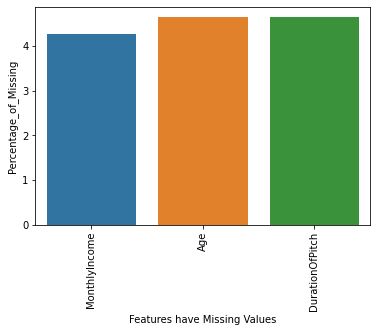

In [18]:
# visualizing missing values with y limit 0 to 1
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90);
plt.ylabel('Percentage_of_Missing')
plt.xlabel('Features have Missing Values')


- Everything is above 1%. It is not appropriate to drop this number of data. Now move towards Fixing missing Data based on Columns

## **Fixing Data based on Columns**
- Dropping the feature column is very simple to do,no longer need to worry about that feature in the future, potential to lose a feature with possible importanant signal and should consider drop feature approach when many rows are NaN.
- Filling in the missing feature data is potentially changing ground truth in data, must decide on reasionable estimation to filled value and must apply transformation to all future data for prediction. It needs domain knowledge information.
- There are few cases in which NaN implied Zero.

In [19]:
# data= data.drop(['FeatureNames'],axis=1) dropping columns if too much data is missing for that particular column
#data['Categorical_Feature'].value_count(),  data['Categorical_Feature']=data['Categorical_Feature'].fillna('None') 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Designation'>

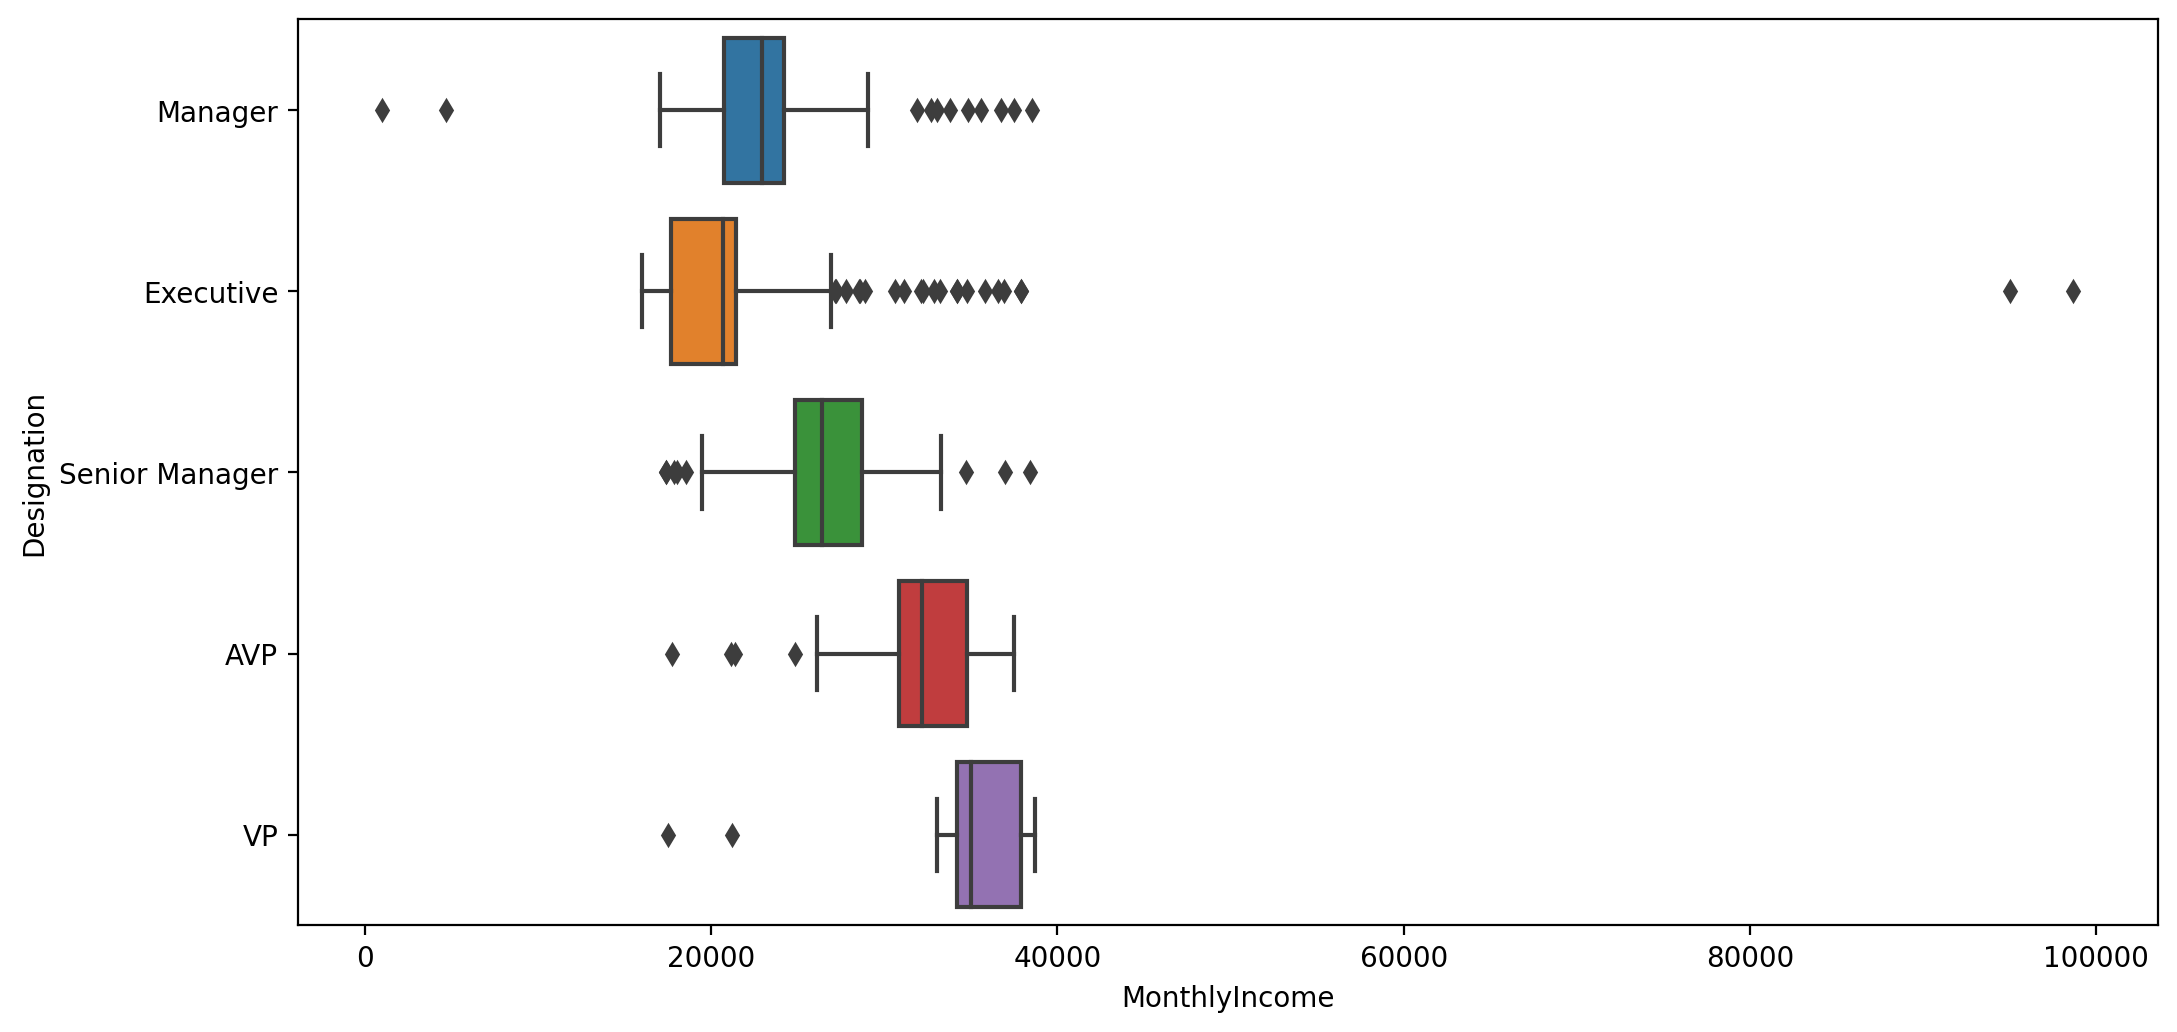

In [20]:
# NUMERIC FEATURE: MonthlyIncome vs 'Designation' 
plt.figure(figsize=(12,6), dpi= 200)
sns.boxplot(x='MonthlyIncome', y='Designation', data = data, orient='h')
# determining the relationship between designation and monthlyincome

#### Filling in anything that was missing in monthlyincome for that particular designation.

In [21]:
data.groupby('Designation')['MonthlyIncome'].mean()

Designation
AVP               32241.046784
Executive         19939.922507
Manager           22643.157629
Senior Manager    26637.749326
VP                35878.947826
Name: MonthlyIncome, dtype: float64

In [22]:
# pandas transformation method: groupby call + apply method
data['MonthlyIncome'] = data.groupby('Designation')['MonthlyIncome'].transform(lambda value: value.fillna(value.mean()))
# filling in missing values in monthly income based of the designation.

In [23]:
#data.groupby('Designation')['MonthlyIncome']  waiting for opeartion to work on.

In [24]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch             226
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
dtype: int64

#### Applying the same approach to filling "DurationOfPitch" and "Age"

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Designation'>

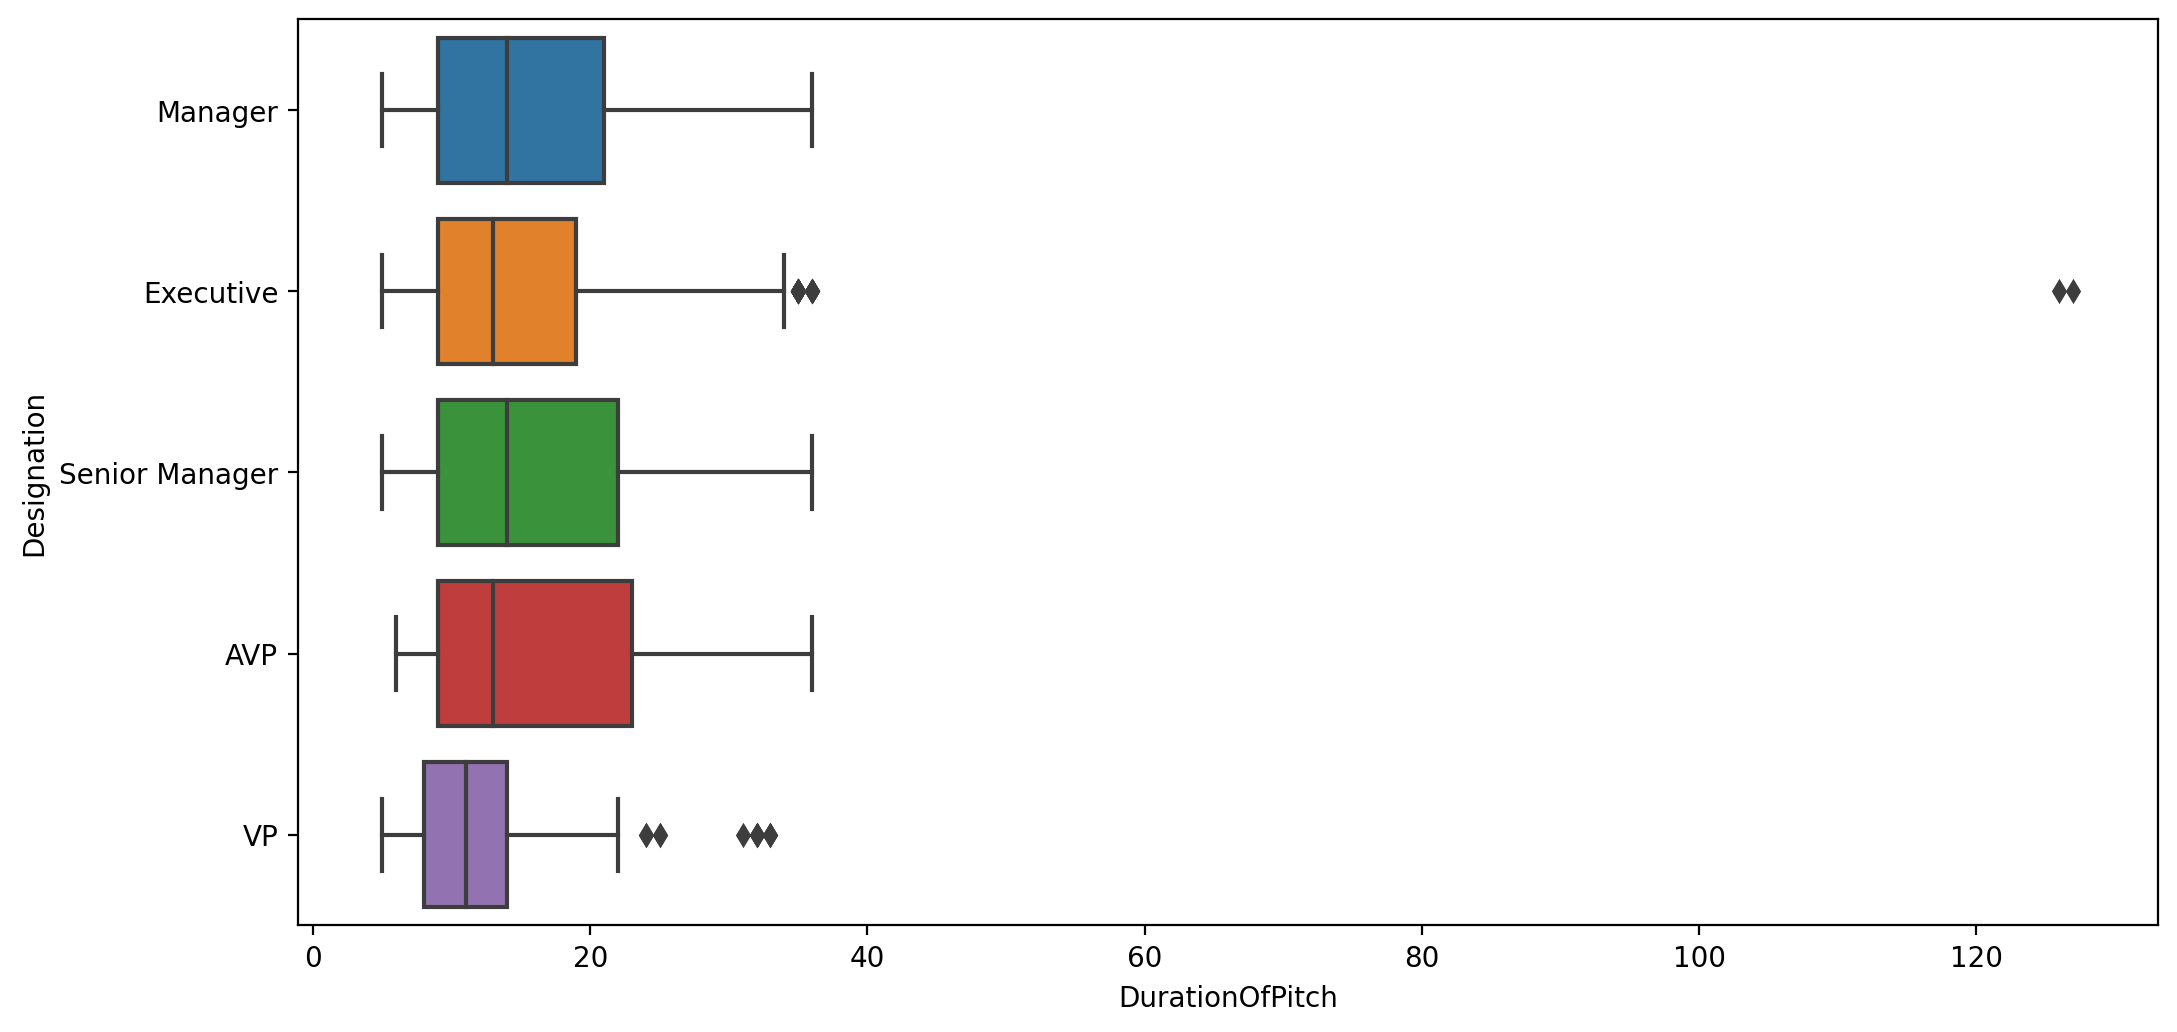

In [88]:
plt.figure(figsize=(12,6), dpi= 200)
sns.boxplot(x='DurationOfPitch', y='Designation', data = data, orient='h')

In [26]:
data.groupby('Designation')['DurationOfPitch'].mean()

Designation
AVP               16.230994
Executive         15.194834
Manager           15.935839
Senior Manager    15.986505
VP                12.100000
Name: DurationOfPitch, dtype: float64

In [27]:
# pandas transformation method: groupby call + apply method
data['DurationOfPitch'] = data.groupby('Designation')['DurationOfPitch'].transform(lambda value: value.fillna(value.mean()))
# filling in missing values in monthly income based of the designation.

In [28]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome                 0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Designation'>

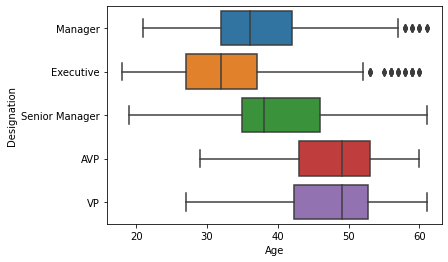

In [32]:
sns.boxplot(x='Age', y='Designation', data = data, orient='h')

In [33]:
data.groupby('Designation')['Age'].mean()

Designation
AVP               48.026316
Executive         33.085900
Manager           37.434597
Senior Manager    40.581646
VP                48.065217
Name: Age, dtype: float64

In [34]:
# pandas transformation method: groupby call + apply method
data['Age'] = data.groupby('Designation')['Age'].transform(lambda value: value.fillna(value.mean()))
# filling in missing values in monthly income based of the designation.

In [35]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [37]:
data.to_csv('Travel_NoNull.csv')